# 1. Loading main packages and functions 

In [27]:
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import itertools
import argparse
import sys
import time
import pickle 
import matplotlib2tikz
from datasets import get_data, partition, non_iid_generator

# Prepare dataset
target_dataset_list = ['communities', 'power', 'MNIST']
target_dataset = target_dataset_list[2]
X_train, X_test, y_train, y_test, no_class = get_data(target_dataset)
  
# make a copy for one-vs-all multiclass classification
y_train_original = np.copy(y_train)  
y_test_original = np.copy(y_test)

#hyper_parameters = {'lambda': 0.1}

from FunctionsLibrary import *

N = 100  # number of workers 
X_train_partitioned, y_train_partitioned = partition(list_in = (X_train, y_train), N=N)
SVRG_epoch_size = 15
learning_rate = 0.2  # to use a higher learning rate than 1/4L, which is a very conservative setting  
no_iterations = 20

smoothness = smoothness_UB(X_train_partitioned, N)

print("Check if data are non-i.i.d: \nL_i = {}".format(np.around(smoothness,3)))

Check if data are non-i.i.d: 
L_i = [20.66  23.691 20.493 23.718 20.759 23.802 20.293 23.462 20.381 23.409
 20.504 23.271 20.324 23.162 20.686 23.661 20.033 23.966 20.152 23.518
 20.764 23.369 20.022 23.591 20.237 23.287 21.041 23.406 20.268 24.123
 20.83  23.091 20.362 23.224 19.856 23.452 20.283 22.983 20.038 23.333
 20.487 22.985 20.774 23.071 20.794 23.365 20.586 23.178 20.307 23.188
 20.172 23.469 20.112 23.767 20.125 23.603 21.101 23.784 20.459 23.453
 20.425 23.168 20.706 23.468 19.986 23.48  20.572 22.941 20.453 23.773
 20.099 23.352 20.172 23.639 20.551 23.763 20.653 23.565 20.269 23.066
 20.455 23.9   21.087 23.824 20.322 23.921 20.175 22.953 20.299 24.009
 20.446 23.813 20.374 23.587 20.044 23.998 20.755 23.655 20.172 23.074]


### Making dataset non-IID 

In [28]:
#included_digits = np.random.randint(no_class, size=(N, 1)) # keeping two digits for every worker
if N==10:
    included_digits = np.array([[0],[9],[5],[4],[3],[6],[8],[7],[2],[1],[0],[9],[5],[4],[3],[6],[8],[7],[2],[1]],
                               dtype=np.int64) # keeping two digits for every worker
elif N==20:
    included_digits = np.array([[0],[9],[5],[4],[3],[6],[8],[7],[2],[1],[0],[9],[5],[4],[3],[6],[8],[7],[2],[1],
                                [0],[9],[5],[4],[3],[6],[8],[7],[2],[1],[0],[9],[5],[4],[3],[6],[8],[7],[2],[1]], 
                               dtype=np.int64) # keeping two digits for every worker
elif N==50:
    included_digits = np.array([[0],[9],[5],[4],[3],[6],[8],[7],[2],[1],[0],[9],[5],[4],[3],[6],[8],[7],[2],[1],
                                [0],[9],[5],[4],[3],[6],[8],[7],[2],[1],[0],[9],[5],[4],[3],[6],[8],[7],[2],[1],
                                [0],[9],[5],[4],[3],[6],[8],[7],[2],[1],[0],[9],[5],[4],[3],[6],[8],[7],[2],[1],
                                [0],[9],[5],[4],[3],[6],[8],[7],[2],[1],[0],[9],[5],[4],[3],[6],[8],[7],[2],[1],
                                [0],[9],[5],[4],[3],[6],[8],[7],[2],[1],[0],[9],[5],[4],[3],[6],[8],[7],[2],[1]], 
                               dtype=np.int64) # keeping two digits for every worker
elif N==100:
    included_digits = np.array([[0],[9],[5],[4],[3],[6],[8],[7],[2],[1],[0],[9],[5],[4],[3],[6],[8],[7],[2],[1],
                                [0],[9],[5],[4],[3],[6],[8],[7],[2],[1],[0],[9],[5],[4],[3],[6],[8],[7],[2],[1],
                                [0],[9],[5],[4],[3],[6],[8],[7],[2],[1],[0],[9],[5],[4],[3],[6],[8],[7],[2],[1],
                                [0],[9],[5],[4],[3],[6],[8],[7],[2],[1],[0],[9],[5],[4],[3],[6],[8],[7],[2],[1],
                                [0],[9],[5],[4],[3],[6],[8],[7],[2],[1],[0],[9],[5],[4],[3],[6],[8],[7],[2],[1]], 
                               dtype=np.int64) # keeping two digits for every worker
        
    
X_train_partitioned_nonIID, y_train_partitioned_nonIID = non_iid_generator(X_train_partitioned, y_train_partitioned, 
                                                                           N, included_digits)

# keeping all classes
#included_digits = np.array([range(no_class) for _ in range(N)]) # keeping all digits for every worker

#X_train_partitioned_nonIID, y_train_partitioned_nonIID = np.copy(X_train_partitioned), np.copy(y_train_partitioned)

smoothness = smoothness_UB(X_train_partitioned_nonIID, N)

#learning_rate = 1/(4*np.mean(smoothness))

print("Setting: A network with {} nodes and learning rate of {}.".format(N, np.around(learning_rate,2)))
print("Included digits per node: {}".format((included_digits.transpose()[0])))
print("\n Check if data are non-i.i.d: L_i = {}".format(np.around(smoothness,2)))


Setting: A network with 100 nodes and learning rate of 2.
Included digits per node: [0 9 5 4 3 6 8 7 2 1 0 9 5 4 3 6 8 7 2 1 0 9 5 4 3 6 8 7 2 1 0 9 5 4 3 6 8
 7 2 1 0 9 5 4 3 6 8 7 2 1 0 9 5 4 3 6 8 7 2 1 0 9 5 4 3 6 8 7 2 1 0 9 5 4
 3 6 8 7 2 1 0 9 5 4 3 6 8 7 2 1 0 9 5 4 3 6 8 7 2 1]

 Check if data are non-i.i.d: L_i = [27.54 22.07 21.32 21.97 20.82 25.14 22.77 21.13 23.28 14.01 28.15 22.84
 20.79 20.98 20.88 24.62 23.77 20.62 23.07 14.76 26.56 20.22 20.56 19.36
 21.42 23.49 24.4  20.03 22.39 14.68 26.55 20.24 20.26 20.6  20.12 24.22
 23.94 20.62 22.51 14.38 26.63 20.17 21.47 19.53 20.62 23.74 24.55 19.99
 23.43 13.96 26.64 21.14 20.51 20.73 20.09 23.91 24.33 19.83 23.44 14.74
 27.03 21.23 21.81 20.31 22.49 25.23 24.04 19.86 21.52 14.56 27.82 21.55
 20.   21.05 21.15 25.15 22.85 19.72 24.01 14.07 26.1  20.02 19.75 20.79
 20.08 26.04 22.89 20.43 22.42 14.03 28.04 21.01 22.92 21.08 21.71 23.57
 24.1  20.26 22.22 13.8 ]


# 2. Binary classification 

In [45]:
#prob_vector = np.array([1,1,1,1,1,1,1,1,1,1], dtype=np.float64)
prob_vector = np.array(np.pad([0.19, 0.1, 0.1, 0.1, 0.1, 0.11, 0.11, 0.09, 0.11, 0.03], (0,N-10), 
                              'constant', constant_values=0), dtype=np.float64)
#prob_vector = np.array(smoothness, dtype=np.float64)
prob_vector = prob_vector/np.sum(prob_vector)

print("Sampling probbaility is: {}\n\n".format(np.around(prob_vector,2)))

if no_class==2:
    # Initialize weights
    w_0 = initialize_w(X_train.shape[1])
    
    hyper_parameters = {'learning_rate': learning_rate, 'iterations': no_iterations, 
                        'SVRG_epoch_size': SVRG_epoch_size, 'no_nodes': N, 'sampling_probability': prob_vector}
    
    outputs = optimizer_binary_classification(target_dataset, X_train_partitioned_nonIID, y_train_partitioned_nonIID, 
                                              X_train, y_train, X_test, y_test, w_0, hyper_parameters)
    pickle_file_name = './TestResults/outputs_binary_'+target_dataset
    with open(pickle_file_name+'.pickle', 'wb') as f:
        pickle.dump(outputs, f)
        
else:
    print('Go to Section 3(b) for one-vs-all multiclass classification')

Sampling probbaility is: [0.18 0.1  0.1  0.1  0.1  0.11 0.11 0.09 0.11 0.03 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


Go to Section 3(b) for one-vs-all multiclass classification


# 3. Multiclass classification 


## Cost of running SVRG and SVRG-AS

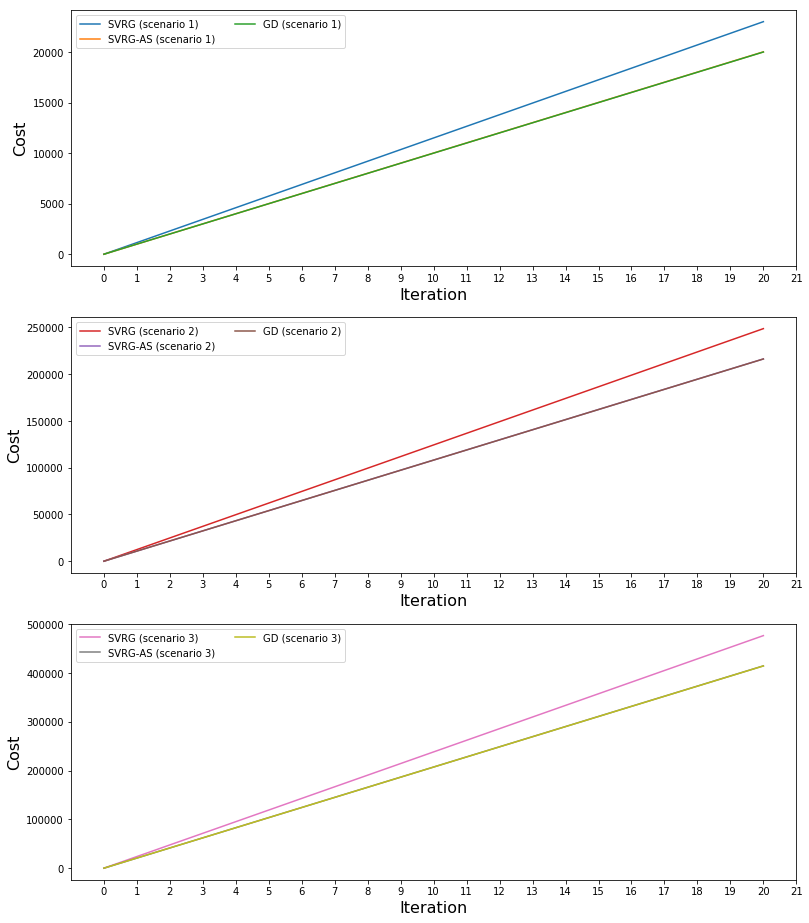

In [46]:
cost_models = [{'values': np.array([[1,1,1,1,1,1,1,1,1,1] for _ in range(int(N/10))]).reshape(-1,N)[0]}, 
               {'values': np.array([[0.1,1,1,1,1,1,1,1,1,100] for _ in range(int(N/10))]).reshape(-1,N)[0]}, 
               {'values': np.array([[0.1,1,1,1,1,1,1,1,100,100] for _ in range(int(N/10))]).reshape(-1,N)[0]}
              ]    
             

hyper_parameters = {'iterations': no_iterations, 'SVRG_epoch_size': SVRG_epoch_size,
                    'cost_model': cost_models, 'sampling_probability': prob_vector}

optimizers = ['SVRG', 'SVRG-AS', 'GD'] 

cost = cost_evaluation_stragglers(target_dataset, optimizers, hyper_parameters, no_class, plot=True)
    
pickle_file_name = './TestResults/_Cost_stragglers_'+target_dataset
with open(pickle_file_name+'_solution.pickle', 'wb') as f:
    pickle.dump(cost, f)

In [48]:
cost

{'scenario_1': {'SVRG': array([    0.,  1150.,  2300.,  3450.,  4600.,  5750.,  6900.,  8050.,
          9200., 10350., 11500., 12650., 13800., 14950., 16100., 17250.,
         18400., 19550., 20700., 21850., 23000.]),
  'SVRG-AS': array([    0.  ,  1000.75,  2001.5 ,  3002.25,  4003.  ,  5003.75,
          6004.5 ,  7005.25,  8006.  ,  9006.75, 10007.5 , 11008.25,
         12009.  , 13009.75, 14010.5 , 15011.25, 16012.  , 17012.75,
         18013.5 , 19014.25, 20015.  ]),
  'GD': array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
          9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
         18000, 19000, 20000], dtype=int32)},
 'scenario_2': {'SVRG': array([     0. ,  12431.5,  24863. ,  37294.5,  49726. ,  62157.5,
          74589. ,  87020.5,  99452. , 111883.5, 124315. , 136746.5,
         149178. , 161609.5, 174041. , 186472.5, 198904. , 211335.5,
         223767. , 236198.5, 248630. ]),
  'SVRG-AS': array([     0.        ,  10812.76850962,  2

.... Class 1 (out of 10) started ....
SVRG; Iter = 00; Objective(train) = 2.334; Objective(test) = 2.442; F1score(train) = 0.901; F1score(test) = 0.899
SVRG; Iter = 01; Objective(train) = 0.758; Objective(test) = 0.728; F1score(train) = 0.912; F1score(test) = 0.910
SVRG; Iter = 02; Objective(train) = 0.463; Objective(test) = 0.397; F1score(train) = 0.962; F1score(test) = 0.960
SVRG; Iter = 03; Objective(train) = 0.262; Objective(test) = 0.224; F1score(train) = 0.967; F1score(test) = 0.967
SVRG; Iter = 04; Objective(train) = 0.232; Objective(test) = 0.189; F1score(train) = 0.972; F1score(test) = 0.972
SVRG; Iter = 05; Objective(train) = 0.194; Objective(test) = 0.158; F1score(train) = 0.974; F1score(test) = 0.974
SVRG; Iter = 06; Objective(train) = 0.174; Objective(test) = 0.139; F1score(train) = 0.977; F1score(test) = 0.976
SVRG; Iter = 07; Objective(train) = 0.160; Objective(test) = 0.126; F1score(train) = 0.978; F1score(test) = 0.978
SVRG; Iter = 08; Objective(train) = 0.151; Objecti

SVRG-AS; Iter = 11; Objective(train) = 0.153; Objective(test) = 0.126; F1score(train) = 0.981; F1score(test) = 0.984
SVRG-AS; Iter = 12; Objective(train) = 0.149; Objective(test) = 0.121; F1score(train) = 0.981; F1score(test) = 0.985
SVRG-AS; Iter = 13; Objective(train) = 0.145; Objective(test) = 0.117; F1score(train) = 0.981; F1score(test) = 0.985
SVRG-AS; Iter = 14; Objective(train) = 0.143; Objective(test) = 0.115; F1score(train) = 0.982; F1score(test) = 0.985
SVRG-AS; Iter = 15; Objective(train) = 0.141; Objective(test) = 0.111; F1score(train) = 0.982; F1score(test) = 0.986
SVRG-AS; Iter = 16; Objective(train) = 0.139; Objective(test) = 0.109; F1score(train) = 0.982; F1score(test) = 0.986
SVRG-AS; Iter = 17; Objective(train) = 0.137; Objective(test) = 0.107; F1score(train) = 0.982; F1score(test) = 0.986
SVRG-AS; Iter = 18; Objective(train) = 0.136; Objective(test) = 0.105; F1score(train) = 0.982; F1score(test) = 0.986
SVRG-AS; Iter = 19; Objective(train) = 0.134; Objective(test) = 

SVRG-AS; Iter = 01; Objective(train) = 1.811; Objective(test) = 1.650; F1score(train) = 0.896; F1score(test) = 0.901
SVRG-AS; Iter = 02; Objective(train) = 1.623; Objective(test) = 1.497; F1score(train) = 0.894; F1score(test) = 0.897
SVRG-AS; Iter = 03; Objective(train) = 1.317; Objective(test) = 1.151; F1score(train) = 0.932; F1score(test) = 0.936
SVRG-AS; Iter = 04; Objective(train) = 1.066; Objective(test) = 0.924; F1score(train) = 0.939; F1score(test) = 0.940
SVRG-AS; Iter = 05; Objective(train) = 0.968; Objective(test) = 0.827; F1score(train) = 0.944; F1score(test) = 0.947
SVRG-AS; Iter = 06; Objective(train) = 0.852; Objective(test) = 0.725; F1score(train) = 0.944; F1score(test) = 0.947
SVRG-AS; Iter = 07; Objective(train) = 0.784; Objective(test) = 0.659; F1score(train) = 0.946; F1score(test) = 0.949
SVRG-AS; Iter = 08; Objective(train) = 0.738; Objective(test) = 0.615; F1score(train) = 0.949; F1score(test) = 0.955
SVRG-AS; Iter = 09; Objective(train) = 0.674; Objective(test) = 

SVRG; Iter = 11; Objective(train) = 0.380; Objective(test) = 0.355; F1score(train) = 0.935; F1score(test) = 0.938
SVRG; Iter = 12; Objective(train) = 0.496; Objective(test) = 0.467; F1score(train) = 0.919; F1score(test) = 0.921
SVRG; Iter = 13; Objective(train) = 1.786; Objective(test) = 1.784; F1score(train) = 0.910; F1score(test) = 0.912
SVRG; Iter = 14; Objective(train) = 1.621; Objective(test) = 1.587; F1score(train) = 0.913; F1score(test) = 0.913
SVRG; Iter = 15; Objective(train) = 0.453; Objective(test) = 0.425; F1score(train) = 0.951; F1score(test) = 0.955
SVRG; Iter = 16; Objective(train) = 0.484; Objective(test) = 0.461; F1score(train) = 0.929; F1score(test) = 0.931
SVRG; Iter = 17; Objective(train) = 0.450; Objective(test) = 0.428; F1score(train) = 0.951; F1score(test) = 0.952
SVRG; Iter = 18; Objective(train) = 0.668; Objective(test) = 0.649; F1score(train) = 0.898; F1score(test) = 0.900
SVRG; Iter = 19; Objective(train) = 1.094; Objective(test) = 1.106; F1score(train) = 0.9

SVRG; Iter = 01; Objective(train) = 0.608; Objective(test) = 0.650; F1score(train) = 0.953; F1score(test) = 0.951
SVRG; Iter = 02; Objective(train) = 0.495; Objective(test) = 0.532; F1score(train) = 0.959; F1score(test) = 0.958
SVRG; Iter = 03; Objective(train) = 0.385; Objective(test) = 0.417; F1score(train) = 0.963; F1score(test) = 0.964
SVRG; Iter = 04; Objective(train) = 0.370; Objective(test) = 0.400; F1score(train) = 0.967; F1score(test) = 0.967
SVRG; Iter = 05; Objective(train) = 0.330; Objective(test) = 0.357; F1score(train) = 0.968; F1score(test) = 0.970
SVRG; Iter = 06; Objective(train) = 0.316; Objective(test) = 0.343; F1score(train) = 0.970; F1score(test) = 0.971
SVRG; Iter = 07; Objective(train) = 0.311; Objective(test) = 0.341; F1score(train) = 0.971; F1score(test) = 0.971
SVRG; Iter = 08; Objective(train) = 0.275; Objective(test) = 0.300; F1score(train) = 0.972; F1score(test) = 0.973
SVRG; Iter = 09; Objective(train) = 0.278; Objective(test) = 0.303; F1score(train) = 0.9

SVRG-AS; Iter = 12; Objective(train) = 0.689; Objective(test) = 0.633; F1score(train) = 0.900; F1score(test) = 0.904
SVRG-AS; Iter = 13; Objective(train) = 0.748; Objective(test) = 0.693; F1score(train) = 0.924; F1score(test) = 0.928
SVRG-AS; Iter = 14; Objective(train) = 0.712; Objective(test) = 0.635; F1score(train) = 0.921; F1score(test) = 0.926
SVRG-AS; Iter = 15; Objective(train) = 0.707; Objective(test) = 0.666; F1score(train) = 0.923; F1score(test) = 0.927
SVRG-AS; Iter = 16; Objective(train) = 1.129; Objective(test) = 1.133; F1score(train) = 0.796; F1score(test) = 0.796
SVRG-AS; Iter = 17; Objective(train) = 1.579; Objective(test) = 1.632; F1score(train) = 0.824; F1score(test) = 0.823
SVRG-AS; Iter = 18; Objective(train) = 2.168; Objective(test) = 1.964; F1score(train) = 0.902; F1score(test) = 0.905
SVRG-AS; Iter = 19; Objective(train) = 1.003; Objective(test) = 0.933; F1score(train) = 0.858; F1score(test) = 0.865
.... Class 9 (out of 10) ended....
.... Class 10 (out of 10) sta

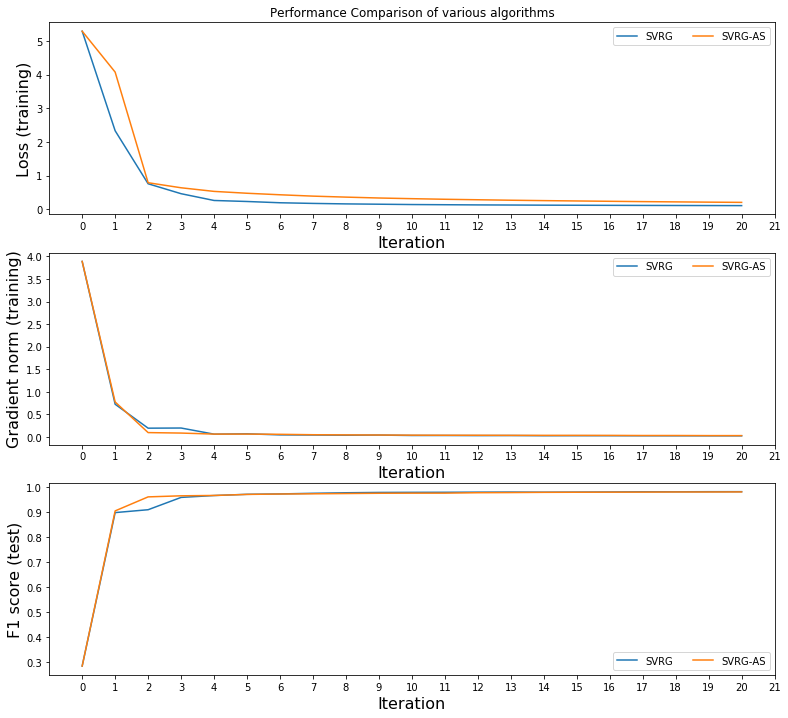

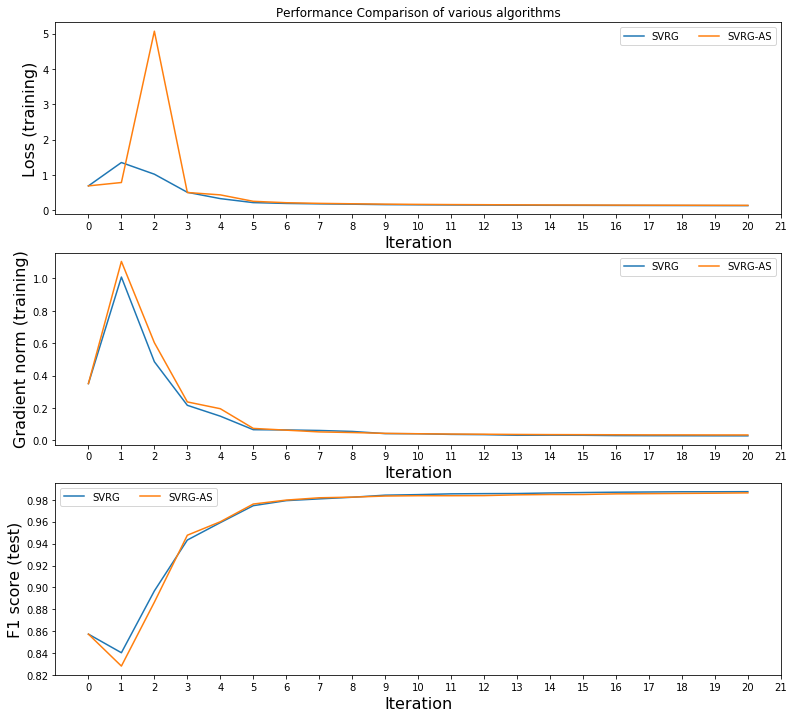

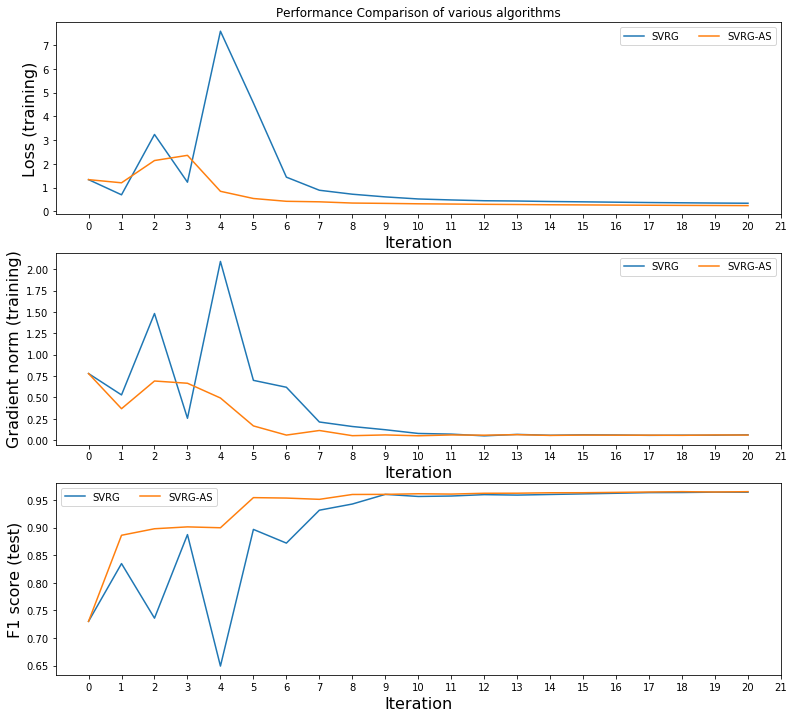

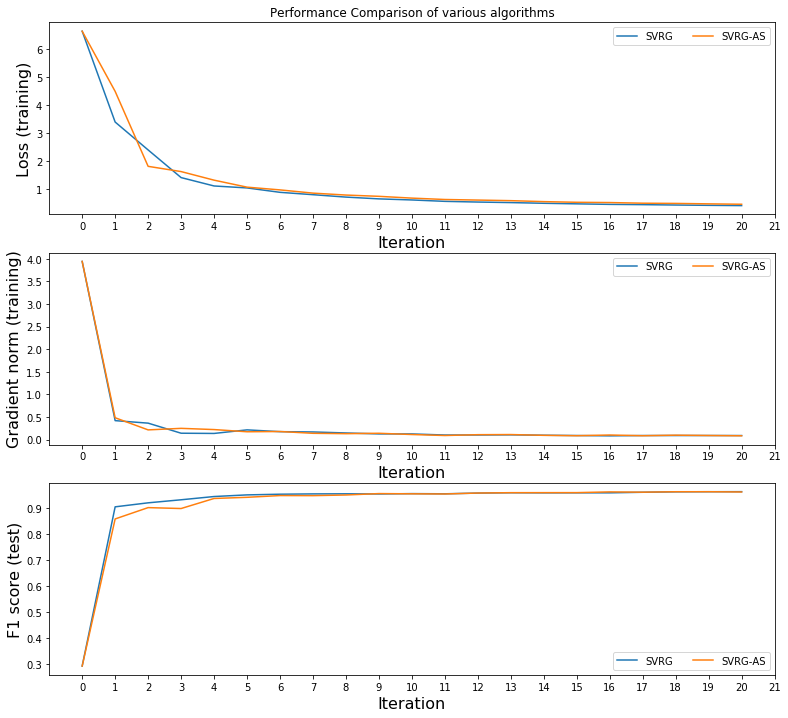

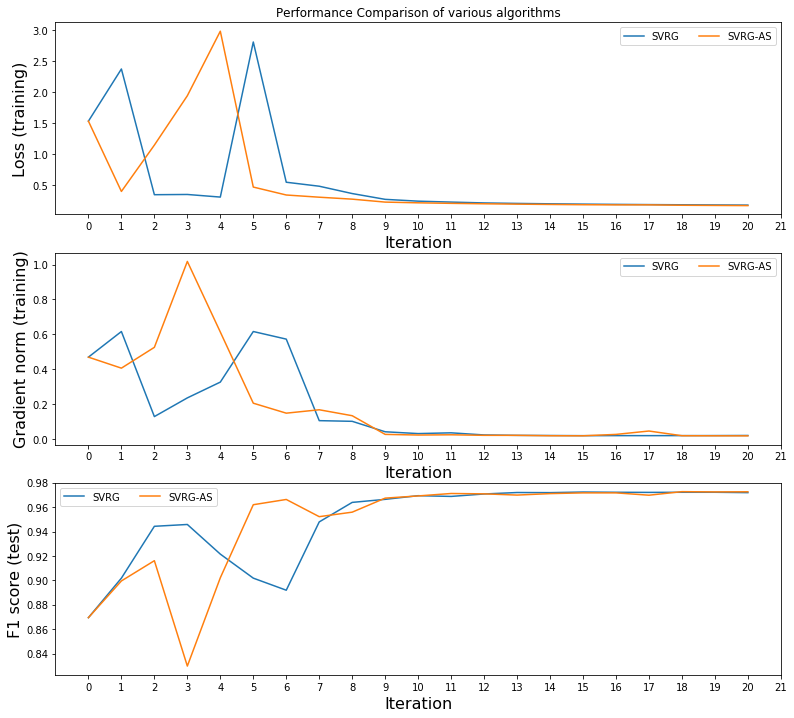

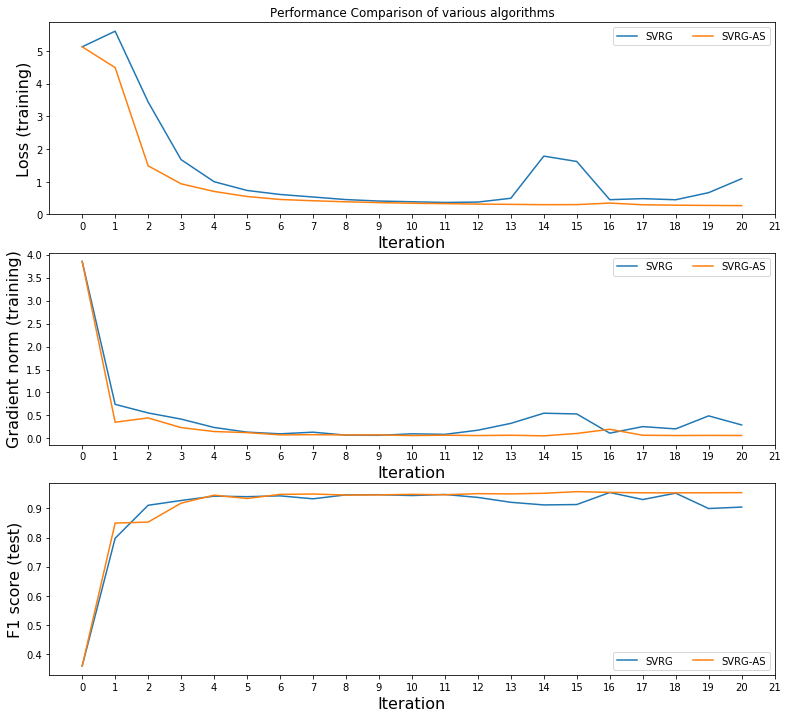

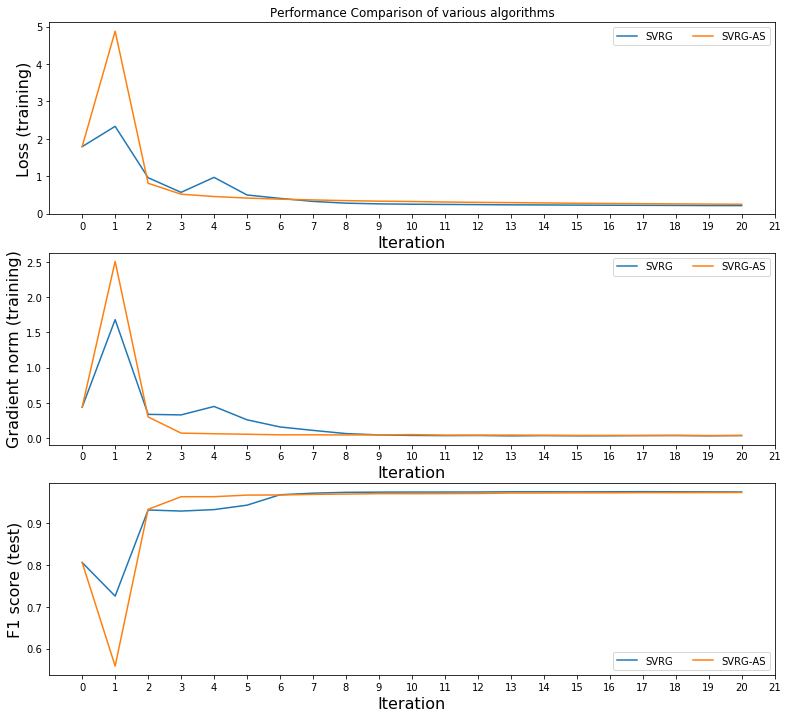

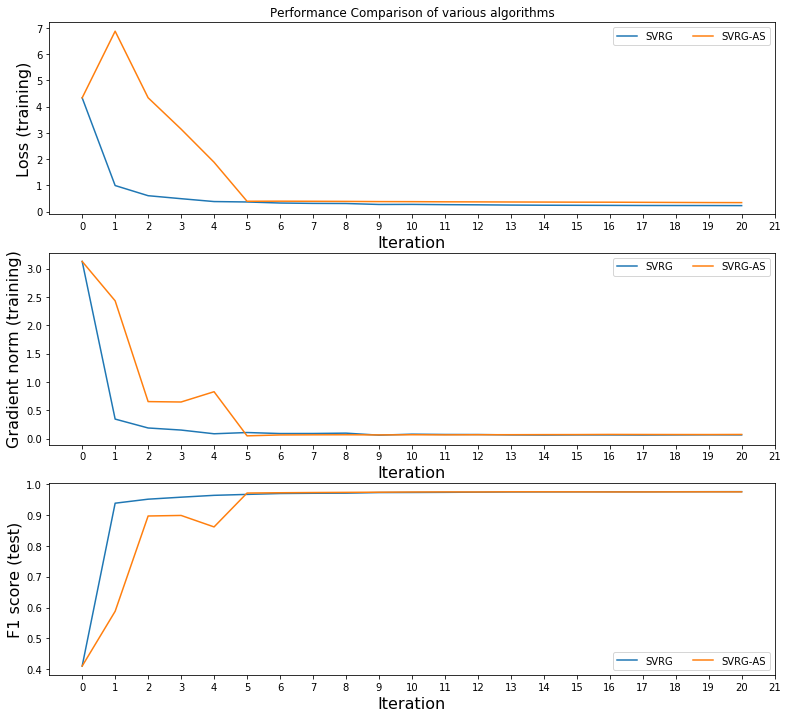

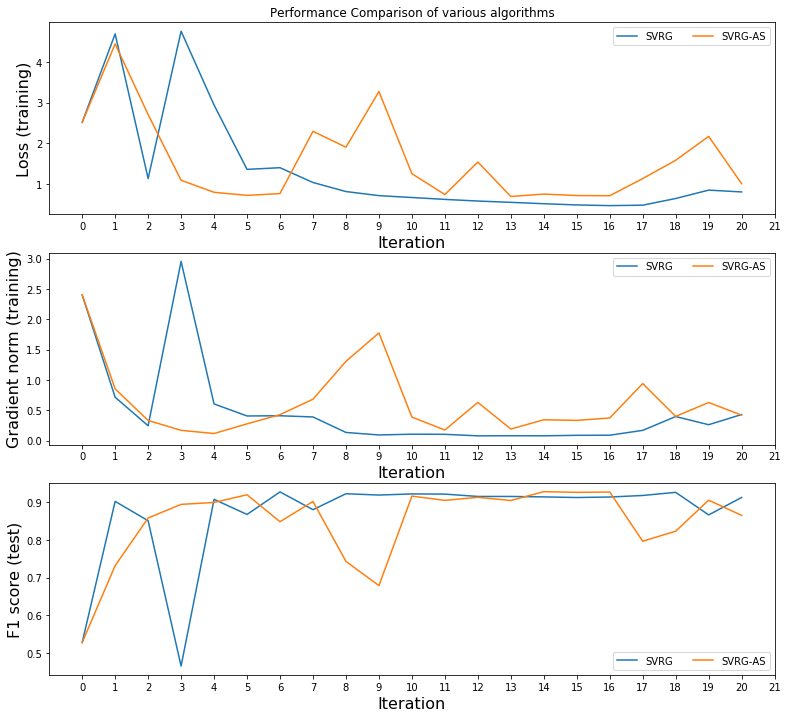

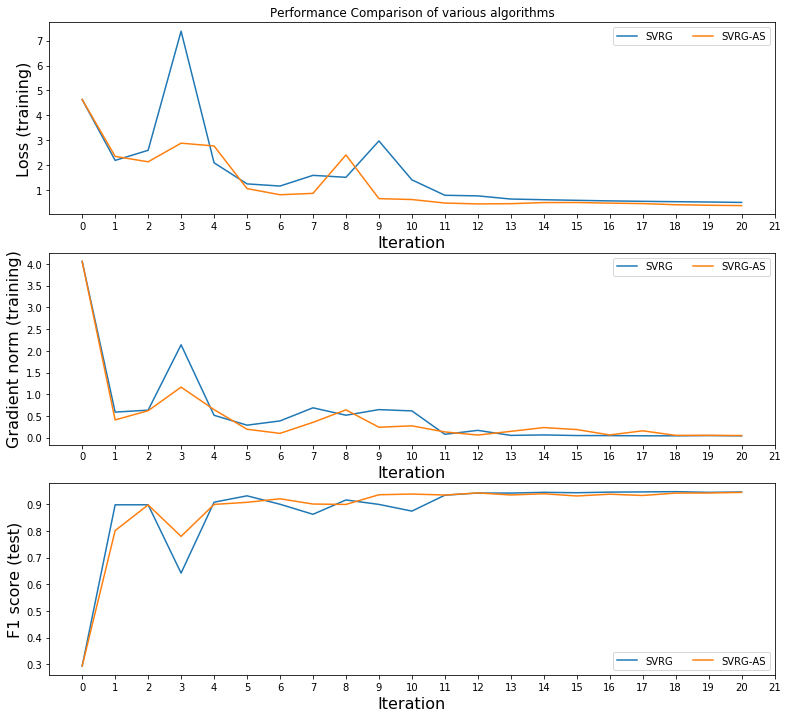

In [49]:
#prob_vector = np.array([1,1,1,1,1,1,1,1,1,1], dtype=np.float64)
#prob_vector = np.array(np.pad([0.19, 0.1, 0.1, 0.1, 0.1, 0.11, 0.11, 0.09, 0.11, 0.03], (0,N-10), 
#                              'constant', constant_values=0), dtype=np.float64)

#prob_vector = np.array([0.19, 0.1, 0.1, 0.1, 0.1, 0.11, 0.11, 0.09, 0.11, 0.03,
#                        0.19, 0.1, 0.1, 0.1, 0.1, 0.11, 0.11, 0.09, 0.11, 0.03], dtype=np.float64)

prob_vector = np.array(smoothness, dtype=np.float64)
prob_vector = prob_vector/np.sum(prob_vector)

outputs = {'no_nodes': N, 'Smoothness': smoothness, 'Private_dataset_digits': included_digits,
           'solution': [], 'sampling_probability': prob_vector, 'time_complexity': [], 'convergence_time': []}
         
        
if no_class>2:
    hyper_parameters = {'learning_rate': learning_rate, 'iterations': no_iterations,
                        'SVRG_epoch_size': SVRG_epoch_size, 'no_nodes': N, 'sampling_probability': prob_vector}

    for class_idx in np.arange(no_class):
        print('.... Class {} (out of {}) started ....'.format(class_idx+1,no_class))
        #y_train = np.copy(y_train_original)
        #y_test = np.copy(y_test_original)
        
        
        y_train_partitioned_nonIID_binary = np.array([np.zeros(y_train_partitioned_nonIID[i].shape, dtype=np.int64) for i in range(N)])  
        y_train_binary = np.zeros(y_train.shape, dtype=np.int64)
        y_test_binary = np.zeros(y_test.shape, dtype=np.int64)

        for n in range(N):
            for j in range(y_train_partitioned_nonIID[n].shape[0]):
                if y_train_partitioned_nonIID[n][j] == class_idx:
                    y_train_partitioned_nonIID_binary[n][j] = 1
                else:
                    y_train_partitioned_nonIID_binary[n][j] = -1

        for j in range(y_train.shape[0]):
            if y_train[j] == class_idx:
                y_train_binary[j] = 1
            else:
                y_train_binary[j] = -1

        for j in range(y_test.shape[0]):
            if y_test[j] == class_idx:
                y_test_binary[j] = 1
            else:
                y_test_binary[j] = -1
                
        # Initialize weights
        w_0 = initialize_w(X_train.shape[1])

        solution_new = optimizer_multiclass_classification(target_dataset, X_train_partitioned_nonIID, 
                                                           y_train_partitioned_nonIID_binary, 
                                                           X_train, y_train_binary, X_test, y_test_binary, w_0, 
                                                           hyper_parameters, class_idx, printout=True)
        outputs['solution'].append(solution_new) 
        print('.... Class {} (out of {}) ended....'.format(class_idx+1,no_class))
        pickle_file_name = './TestResults/_'+target_dataset
        with open(pickle_file_name+'_outputs_multiclass.pickle', 'wb') as f:
            pickle.dump(outputs, f)


In [50]:
'''
#To load the results for existing solution of MNIST, run with noBits=str(7) or str(10) or any other existing value

noBits = str(10)
with open('./TestResults/P_'+noBits+'_Q_'+noBits+'_withQuant_MNIST_solution.pickle', 'rb') as f:
        w=pickle.load(f)
'''

w = outputs['solution']
y_pred_SVRG = np.zeros(len(y_test), dtype=np.int64)
y_pred_SVRG_AS = np.zeros(len(y_test), dtype=np.int64)
for idx in np.arange(len(y_test)):
    classProbabilities_SVRG = [sigmoid(X_test[idx] @ w[i]['SVRG']['optimal_parameter']) for i in np.arange(10)]
    y_pred_SVRG[idx] = int(classProbabilities_SVRG.index(max(classProbabilities_SVRG)))
    
    classProbabilities_SVRG_AS = [sigmoid(X_test[idx] @ w[i]['SVRG-AS']['optimal_parameter']) for i in np.arange(10)]
    y_pred_SVRG_AS[idx] = int(classProbabilities_SVRG_AS.index(max(classProbabilities_SVRG_AS)))

from sklearn.metrics import confusion_matrix
print('SVRG: F1 score: {}, \n Confusion matrix: \n{}'.format(f1_score(y_test, y_pred_SVRG, average='micro'), 
                                                             confusion_matrix(y_test, y_pred_SVRG)))

print('\n \n SVRG-AS: F1 score: {}, \n Confusion matrix: \n{}'.format(f1_score(y_test, y_pred_SVRG_AS, average='micro'), 
                                                             confusion_matrix(y_test, y_pred_SVRG_AS)))

SVRG: F1 score: 0.8415, 
 Confusion matrix: 
[[ 953    0    1    3    2    6   10    3    2    0]
 [   0 1062    4   16    1   30    6    1   15    0]
 [  26    6  917    7   16   11   14   11    9   15]
 [  17    0   53  729    2  167    4    6   19   13]
 [   6    0    2    7  865    1   21    1    5   74]
 [  31   12   14   18   55  677   30   14   32    9]
 [  41    2   30    1   14   10  846    0   13    1]
 [   6   19   63   16   13    4    4  867    2   34]
 [  50   30   23   32   29   81   11   11  685   22]
 [  25    2   17   24   50   18    2   32   25  814]]

 
 SVRG-AS: F1 score: 0.8391, 
 Confusion matrix: 
[[ 939    0    1    3    3   12   15    3    4    0]
 [   0 1038    4    8    0    3    5    1   76    0]
 [  24    2  883    9   14   10   20    8   48   14]
 [   8    0   51  809    1   47    4    6   73   11]
 [   2    1    6    7  844    1   11    1   52   57]
 [  14   15   18   27   18  646   22   11  114    7]
 [  27    4   34    2   14   17  823    0   37    0]
 

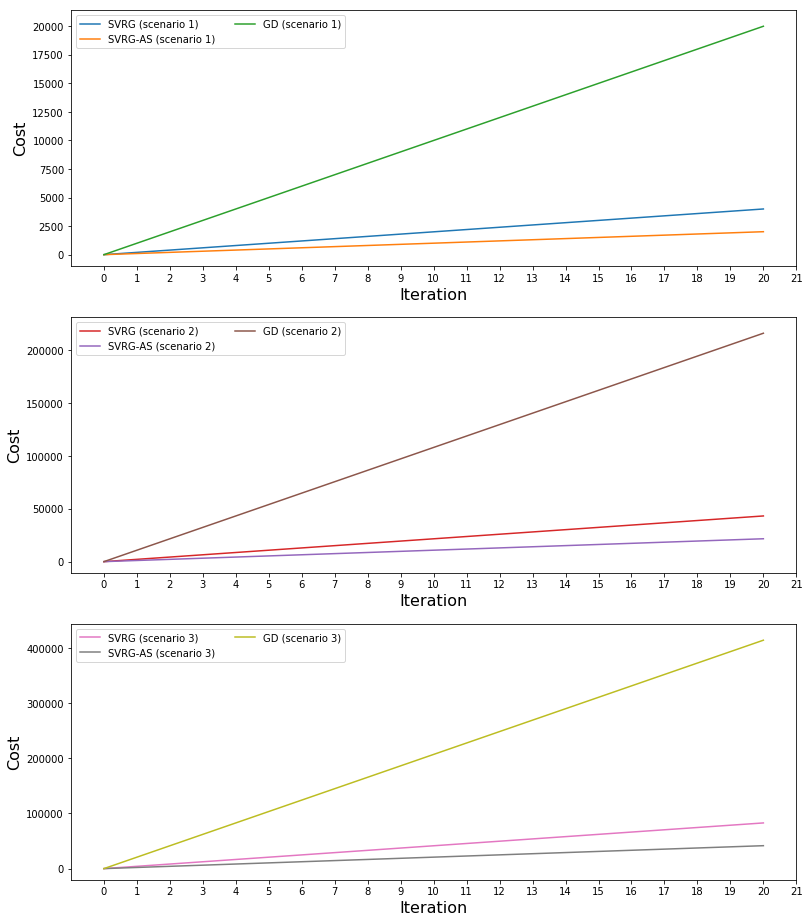

# Minibatch updates in inner-loop 

## Cost model of shared wireless channel 


C:\Users\hshokri\Anaconda3\lib\site-packages\matplotlib2tikz\axes.py:508: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  major_ticks_bottom = [tick.tick1On for tick in major_ticks]
C:\Users\hshokri\Anaconda3\lib\site-packages\matplotlib2tikz\axes.py:509: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.get_visible instead.
  major_ticks_top = [tick.tick2On for tick in major_ticks]


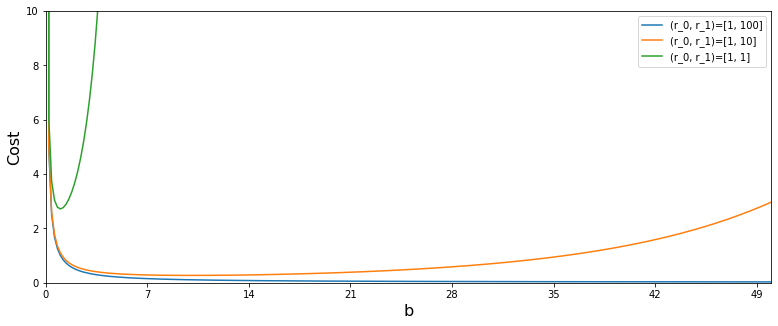

In [4]:
prob_vector = p_LB_congestion(smoothness, alpha=learning_rate, N=N, K=no_iterations, T=SVRG_epoch_size, mu=min(smoothness)*0.7, eps1=0.1, Delta0=1)

cost_models = [{'rate_models': [[1,100],[1,10], [1,1]], 
                'values': np.array([[1,1,1,1,1,1,1,1,1,1] for _ in range(10)]).reshape(-1,100)[0]}, 
               {'rate_models': [[100,100],[100,2], [1,10]],
                'values': np.array([[0.1,1,1,1,1,1,1,1,1,100] for _ in range(10)]).reshape(-1,100)[0]}, 
               {'rate_models': [[100,100],[100,2], [1,10]],
                'values': np.array([[0.1,1,1,1,1,1,1,1,100,100] for _ in range(10)]).reshape(-1,100)[0]}
              ] 


hyper_parameters = {'iterations': no_iterations, 'SVRG_epoch_size': SVRG_epoch_size,
                    'cost_model': cost_models, 'sampling_probability': prob_vector}

cost = cost_function_congestion(hyper_parameters, plot=True)


## Multiclass classification 


In [55]:
learning_rate = 0.2
mu = min(smoothness)*0.3
i = 40
learning_rate /= i
eps1 = 0.1
Delta0 = 3
sigma_max = (eps1/Delta0)**(1/no_iterations)
SVRG_epoch_size = np.ceil(T_LB(mu, alpha=learning_rate, L=np.mean(smoothness), sigma_max=sigma_max)).astype(int)
prob_vector = p_LB_congestion(smoothness, alpha=learning_rate, N=N, 
                              K=no_iterations, T=SVRG_epoch_size, mu=mu, eps1=eps1, Delta0=Delta0)

print('Learning rate: {}\nnumber of iterations: {}\nTarget constraction factor (sigma_max): {}\nT: {}\nb: {}'.format(learning_rate,
                                                                                                                     no_iterations, 
                                                                                                                     sigma_max, 
                                                                                                                     SVRG_epoch_size,
                                                                                                                     np.sum(prob_vector)))


Learning rate: 0.005
number of iterations: 20
Target constraction factor (sigma_max): 0.8436143086693105
T: 109
b: 0.9959871832441427


In [57]:
1/(4*np.mean(smoothness))

0.011556927720586

.... Class 1 (out of 10) started ....
m-SVRG; Iter = 00; Objective(train) = 1.382; Objective(test) = 1.335; F1score(train) = 0.773; F1score(test) = 0.776
m-SVRG; Iter = 01; Objective(train) = 1.237; Objective(test) = 1.186; F1score(train) = 0.809; F1score(test) = 0.814
m-SVRG; Iter = 02; Objective(train) = 1.137; Objective(test) = 1.084; F1score(train) = 0.828; F1score(test) = 0.834
m-SVRG; Iter = 03; Objective(train) = 1.052; Objective(test) = 0.997; F1score(train) = 0.839; F1score(test) = 0.845
m-SVRG; Iter = 04; Objective(train) = 0.976; Objective(test) = 0.921; F1score(train) = 0.848; F1score(test) = 0.853
m-SVRG; Iter = 05; Objective(train) = 0.908; Objective(test) = 0.852; F1score(train) = 0.855; F1score(test) = 0.861
m-SVRG; Iter = 06; Objective(train) = 0.847; Objective(test) = 0.791; F1score(train) = 0.861; F1score(test) = 0.868
m-SVRG; Iter = 07; Objective(train) = 0.792; Objective(test) = 0.736; F1score(train) = 0.866; F1score(test) = 0.874
m-SVRG; Iter = 08; Objective(train

m-SVRG-AS; Iter = 09; Objective(train) = 0.559; Objective(test) = 0.566; F1score(train) = 0.890; F1score(test) = 0.892
m-SVRG-AS; Iter = 10; Objective(train) = 0.539; Objective(test) = 0.546; F1score(train) = 0.892; F1score(test) = 0.895
m-SVRG-AS; Iter = 11; Objective(train) = 0.520; Objective(test) = 0.527; F1score(train) = 0.895; F1score(test) = 0.897
m-SVRG-AS; Iter = 12; Objective(train) = 0.502; Objective(test) = 0.508; F1score(train) = 0.897; F1score(test) = 0.899
m-SVRG-AS; Iter = 13; Objective(train) = 0.484; Objective(test) = 0.490; F1score(train) = 0.898; F1score(test) = 0.900
m-SVRG-AS; Iter = 14; Objective(train) = 0.467; Objective(test) = 0.472; F1score(train) = 0.900; F1score(test) = 0.902
m-SVRG-AS; Iter = 15; Objective(train) = 0.451; Objective(test) = 0.455; F1score(train) = 0.901; F1score(test) = 0.903
m-SVRG-AS; Iter = 16; Objective(train) = 0.435; Objective(test) = 0.439; F1score(train) = 0.903; F1score(test) = 0.904
m-SVRG-AS; Iter = 17; Objective(train) = 0.420; 

m-SVRG; Iter = 18; Objective(train) = 0.512; Objective(test) = 0.481; F1score(train) = 0.885; F1score(test) = 0.888
m-SVRG; Iter = 19; Objective(train) = 0.504; Objective(test) = 0.473; F1score(train) = 0.886; F1score(test) = 0.889
m-SVRG-AS; Iter = 00; Objective(train) = 0.948; Objective(test) = 0.908; F1score(train) = 0.823; F1score(test) = 0.822
m-SVRG-AS; Iter = 01; Objective(train) = 0.893; Objective(test) = 0.852; F1score(train) = 0.831; F1score(test) = 0.832
m-SVRG-AS; Iter = 02; Objective(train) = 0.844; Objective(test) = 0.803; F1score(train) = 0.837; F1score(test) = 0.837
m-SVRG-AS; Iter = 03; Objective(train) = 0.801; Objective(test) = 0.760; F1score(train) = 0.842; F1score(test) = 0.842
m-SVRG-AS; Iter = 04; Objective(train) = 0.762; Objective(test) = 0.722; F1score(train) = 0.846; F1score(test) = 0.848
m-SVRG-AS; Iter = 05; Objective(train) = 0.728; Objective(test) = 0.689; F1score(train) = 0.850; F1score(test) = 0.854
m-SVRG-AS; Iter = 06; Objective(train) = 0.698; Object

m-SVRG; Iter = 07; Objective(train) = 1.120; Objective(test) = 1.148; F1score(train) = 0.810; F1score(test) = 0.807
m-SVRG; Iter = 08; Objective(train) = 1.084; Objective(test) = 1.110; F1score(train) = 0.812; F1score(test) = 0.810
m-SVRG; Iter = 09; Objective(train) = 1.050; Objective(test) = 1.075; F1score(train) = 0.815; F1score(test) = 0.812
m-SVRG; Iter = 10; Objective(train) = 1.019; Objective(test) = 1.043; F1score(train) = 0.817; F1score(test) = 0.814
m-SVRG; Iter = 11; Objective(train) = 0.990; Objective(test) = 1.012; F1score(train) = 0.819; F1score(test) = 0.817
m-SVRG; Iter = 12; Objective(train) = 0.963; Objective(test) = 0.984; F1score(train) = 0.821; F1score(test) = 0.820
m-SVRG; Iter = 13; Objective(train) = 0.938; Objective(test) = 0.958; F1score(train) = 0.823; F1score(test) = 0.822
m-SVRG; Iter = 14; Objective(train) = 0.915; Objective(test) = 0.934; F1score(train) = 0.825; F1score(test) = 0.825
m-SVRG; Iter = 15; Objective(train) = 0.893; Objective(test) = 0.911; F1

m-SVRG-AS; Iter = 17; Objective(train) = 0.474; Objective(test) = 0.432; F1score(train) = 0.880; F1score(test) = 0.890
m-SVRG-AS; Iter = 18; Objective(train) = 0.459; Objective(test) = 0.419; F1score(train) = 0.884; F1score(test) = 0.893
m-SVRG-AS; Iter = 19; Objective(train) = 0.446; Objective(test) = 0.406; F1score(train) = 0.887; F1score(test) = 0.895
.... Class 7 (out of 10) ended....
.... Class 8 (out of 10) started ....
m-SVRG; Iter = 00; Objective(train) = 1.899; Objective(test) = 1.957; F1score(train) = 0.677; F1score(test) = 0.673
m-SVRG; Iter = 01; Objective(train) = 1.250; Objective(test) = 1.278; F1score(train) = 0.762; F1score(test) = 0.761
m-SVRG; Iter = 02; Objective(train) = 1.018; Objective(test) = 1.037; F1score(train) = 0.800; F1score(test) = 0.800
m-SVRG; Iter = 03; Objective(train) = 0.897; Objective(test) = 0.913; F1score(train) = 0.822; F1score(test) = 0.822
m-SVRG; Iter = 04; Objective(train) = 0.815; Objective(test) = 0.831; F1score(train) = 0.835; F1score(test

m-SVRG-AS; Iter = 06; Objective(train) = 0.943; Objective(test) = 0.932; F1score(train) = 0.815; F1score(test) = 0.820
m-SVRG-AS; Iter = 07; Objective(train) = 0.913; Objective(test) = 0.901; F1score(train) = 0.817; F1score(test) = 0.821
m-SVRG-AS; Iter = 08; Objective(train) = 0.886; Objective(test) = 0.873; F1score(train) = 0.819; F1score(test) = 0.822
m-SVRG-AS; Iter = 09; Objective(train) = 0.862; Objective(test) = 0.847; F1score(train) = 0.821; F1score(test) = 0.824
m-SVRG-AS; Iter = 10; Objective(train) = 0.839; Objective(test) = 0.824; F1score(train) = 0.824; F1score(test) = 0.827
m-SVRG-AS; Iter = 11; Objective(train) = 0.818; Objective(test) = 0.802; F1score(train) = 0.827; F1score(test) = 0.830
m-SVRG-AS; Iter = 12; Objective(train) = 0.799; Objective(test) = 0.782; F1score(train) = 0.829; F1score(test) = 0.831
m-SVRG-AS; Iter = 13; Objective(train) = 0.782; Objective(test) = 0.764; F1score(train) = 0.831; F1score(test) = 0.832
m-SVRG-AS; Iter = 14; Objective(train) = 0.765; 

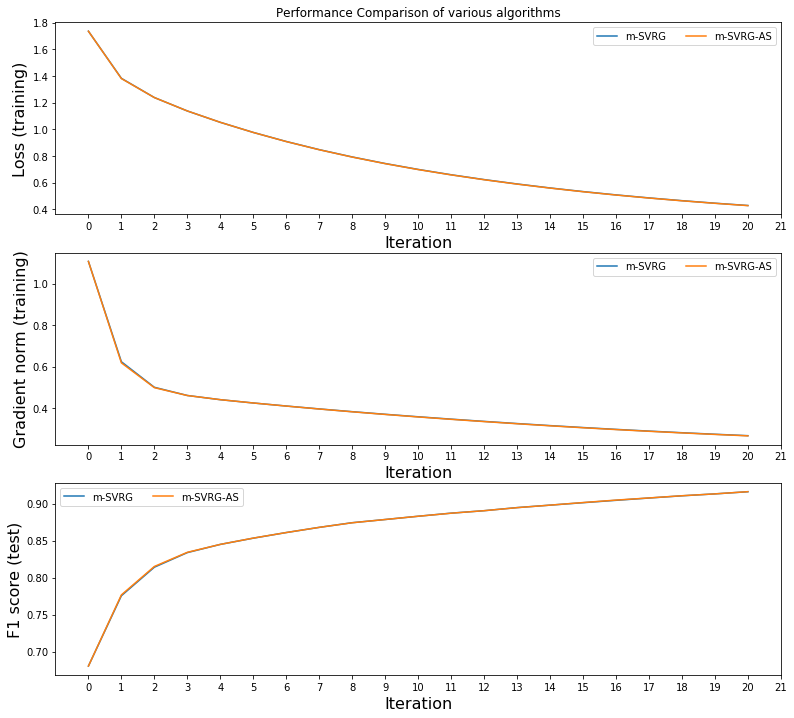

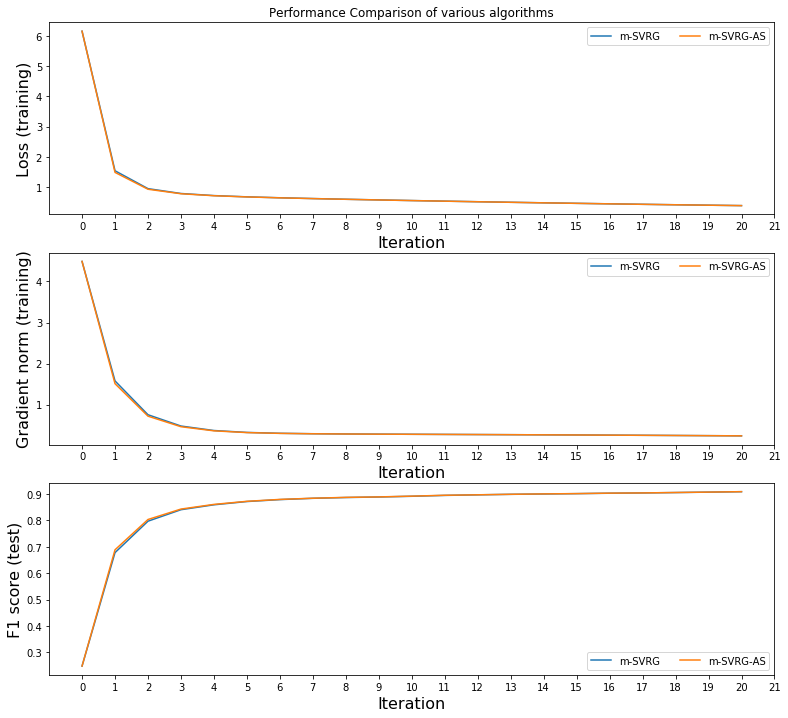

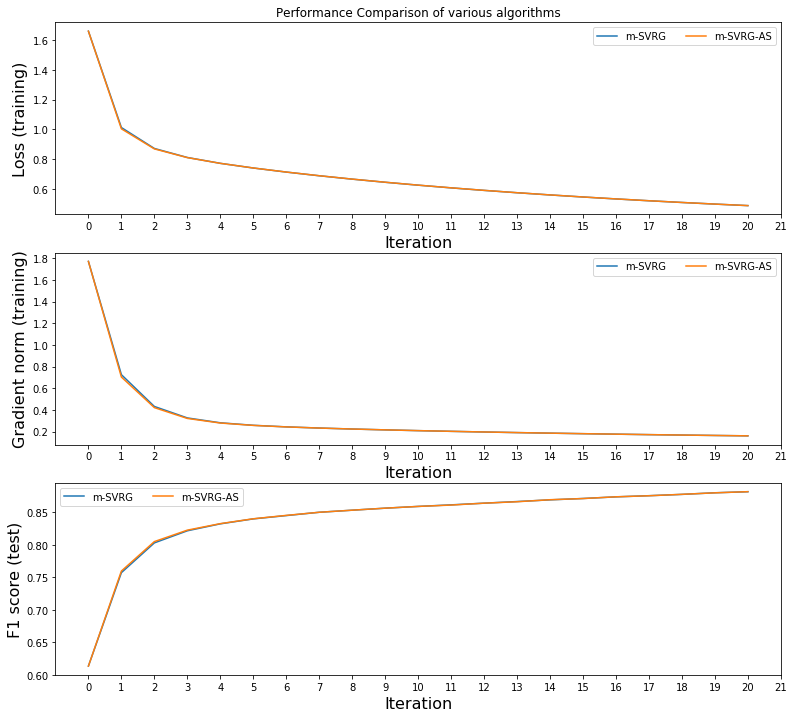

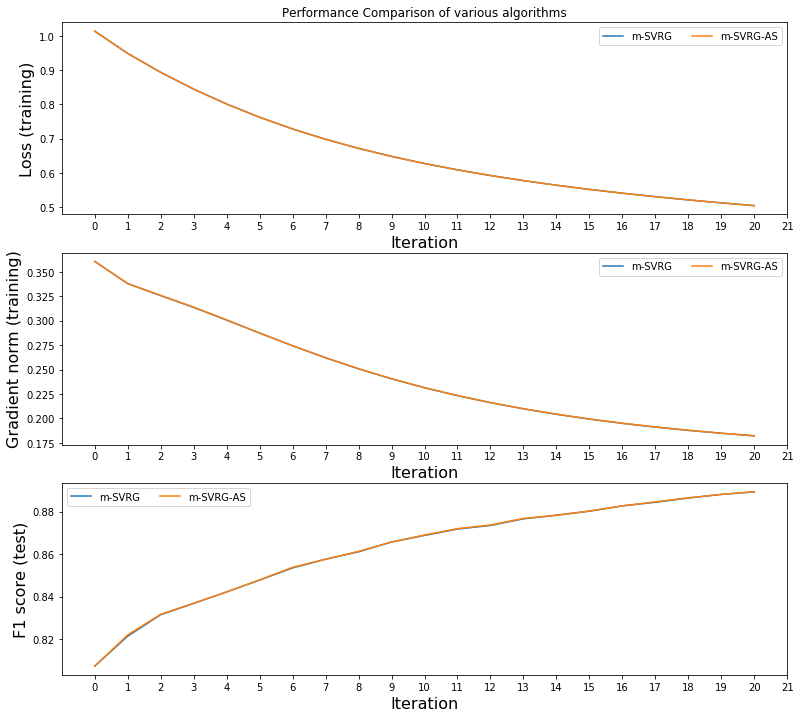

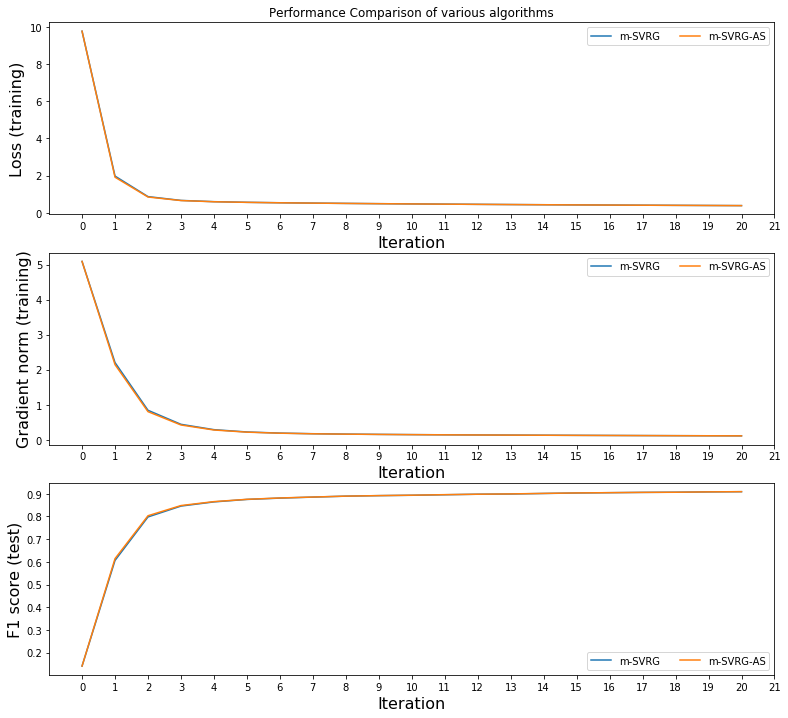

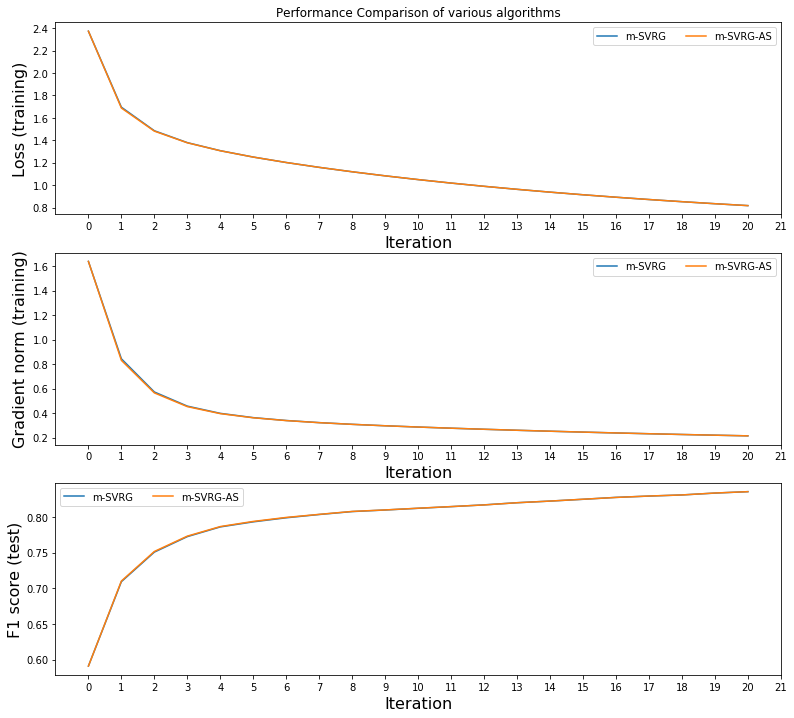

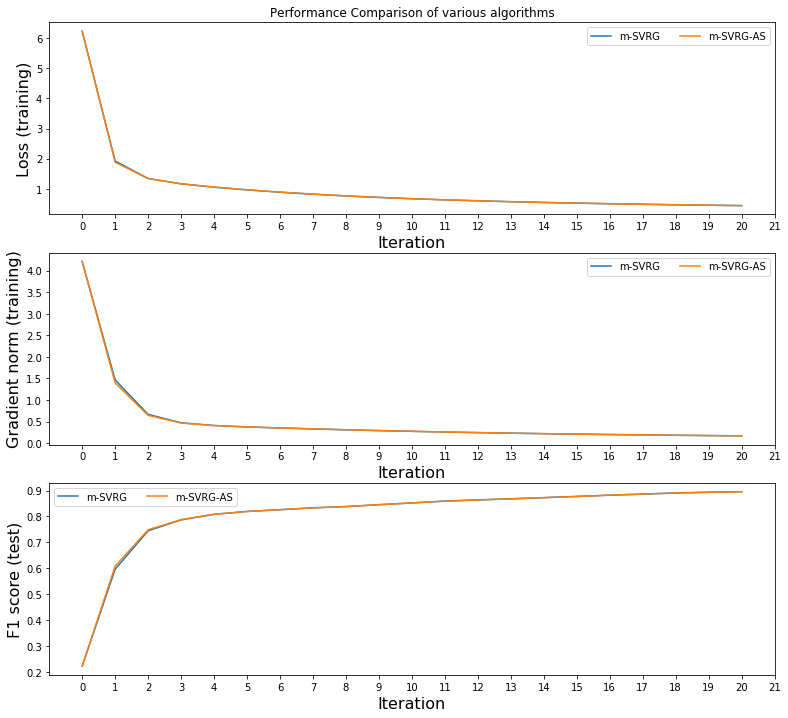

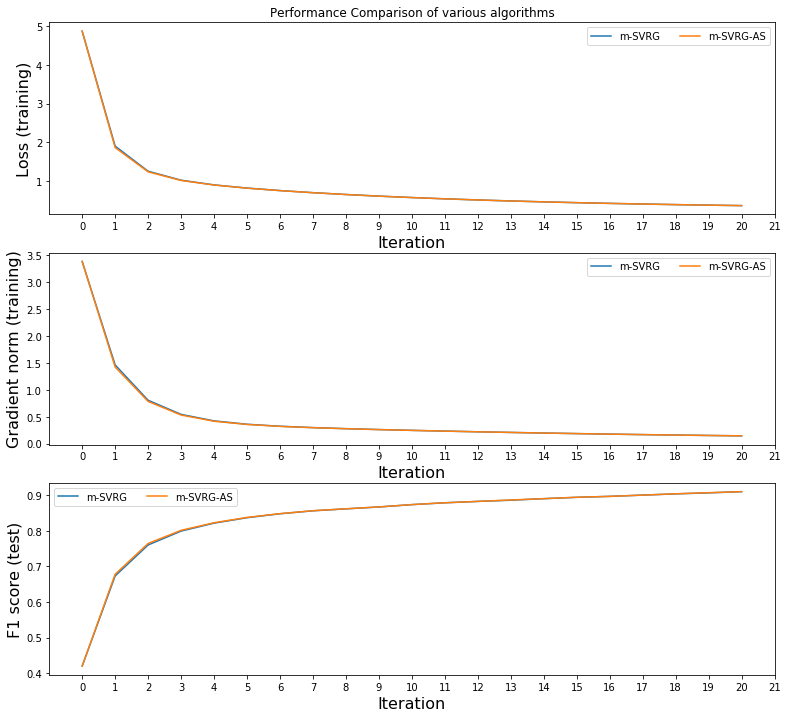

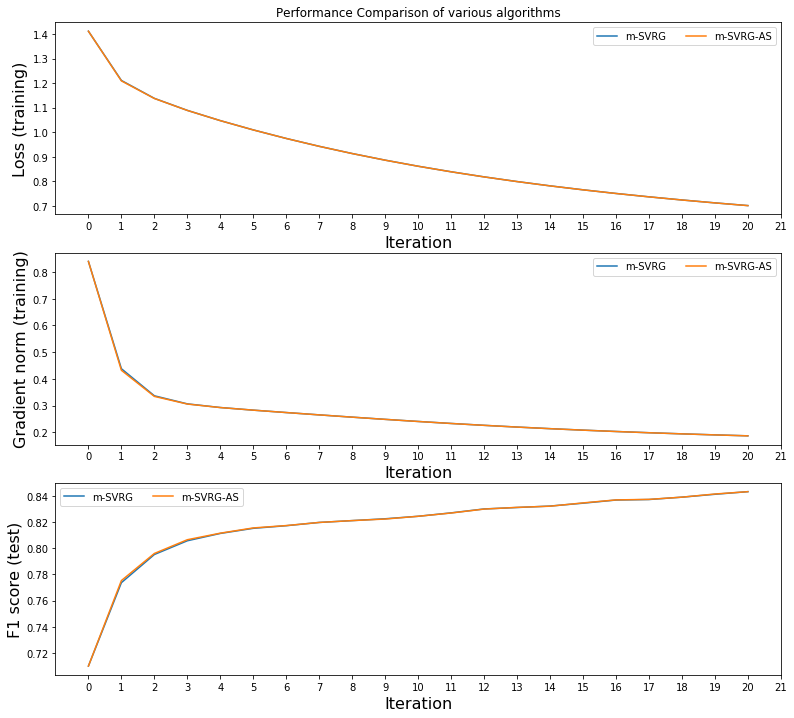

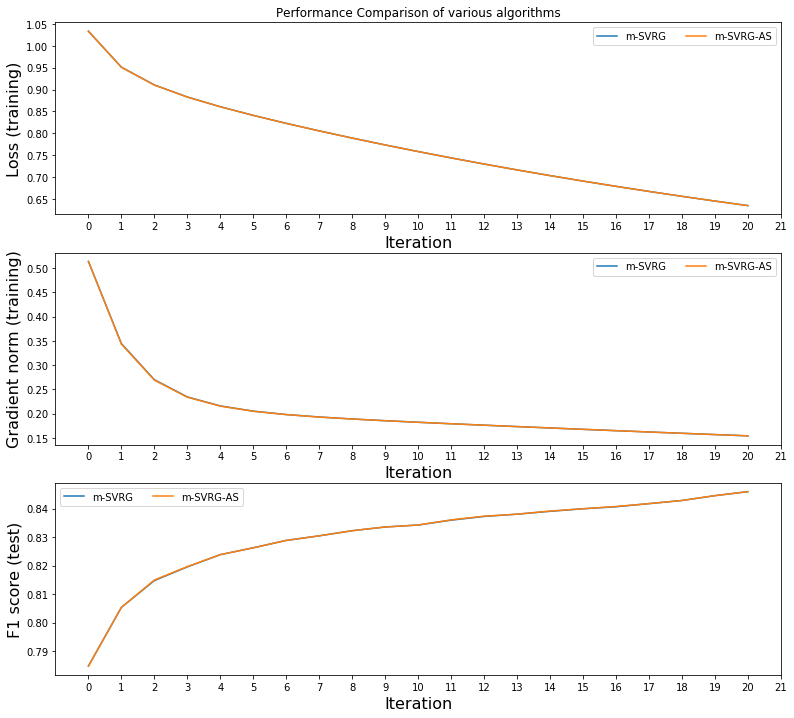

In [14]:
r1 = 50
prob_vector = p_LB_congestion(smoothness, alpha=learning_rate, N=N, 
                              K=no_iterations, T=SVRG_epoch_size, mu=mu, eps1=eps1, Delta0=Delta0)

#prob_vector = np.array(np.pad([0.19, 0.1, 0.1, 0.1, 0.1, 0.11, 0.11, 0.09, 0.11, 0.03,
#                               0.19, 0.1, 0.1, 0.1, 0.1, 0.11, 0.11, 0.09, 0.11], (0,N-99), 
#                              'constant', constant_values=0), dtype=np.float64)

prob_vector = prob_vector*r1/sum(prob_vector) 



#learning_rate = 0.2
#SVRG_epoch_size = 15



#prob_vector = np.array(smoothness, dtype=np.float64)
minibatch_size = np.round(np.sum(prob_vector))

outputs = {'no_nodes': N, 'Smoothness': smoothness, 'Private_dataset_digits': included_digits,
           'solution': [], 'sampling_probability': prob_vector, 'time_complexity': [], 'convergence_time': [], 
           'minibatch_size': minibatch_size}
         
        
if no_class>2:
    hyper_parameters = {'learning_rate': learning_rate, 'iterations': no_iterations,
                        'SVRG_epoch_size': SVRG_epoch_size, 'no_nodes': N, 'sampling_probability': prob_vector,
                        'minibatch_size': minibatch_size}

    for class_idx in np.arange(no_class):
        print('.... Class {} (out of {}) started ....'.format(class_idx+1,no_class))
        #y_train = np.copy(y_train_original)
        #y_test = np.copy(y_test_original)
        
        
        y_train_partitioned_nonIID_binary = np.array([np.zeros(y_train_partitioned_nonIID[i].shape, dtype=np.int64) for i in range(N)])  
        y_train_binary = np.zeros(y_train.shape, dtype=np.int64)
        y_test_binary = np.zeros(y_test.shape, dtype=np.int64)

        for n in range(N):
            for j in range(y_train_partitioned_nonIID[n].shape[0]):
                if y_train_partitioned_nonIID[n][j] == class_idx:
                    y_train_partitioned_nonIID_binary[n][j] = 1
                else:
                    y_train_partitioned_nonIID_binary[n][j] = -1

        for j in range(y_train.shape[0]):
            if y_train[j] == class_idx:
                y_train_binary[j] = 1
            else:
                y_train_binary[j] = -1

        for j in range(y_test.shape[0]):
            if y_test[j] == class_idx:
                y_test_binary[j] = 1
            else:
                y_test_binary[j] = -1
                
        # Initialize weights
        w_0 = initialize_w(X_train.shape[1])

        solution_new = optimizer_multiclass_classification_minibatch(target_dataset, X_train_partitioned_nonIID, 
                                                                     y_train_partitioned_nonIID_binary, 
                                                                     X_train, y_train_binary, X_test, y_test_binary, w_0, 
                                                                     hyper_parameters, class_idx, printout=True)
        outputs['solution'].append(solution_new) 
        print('.... Class {} (out of {}) ended....'.format(class_idx+1,no_class))
        pickle_file_name = './TestResults/_'+target_dataset
        with open(pickle_file_name+'_outputs_multiclass_b_.pickle'.format(minibatch_size), 'wb') as f:
            pickle.dump(outputs, f)


r=10, class 4

m-SVRG-AS; Iter = 00; Objective(train) = 1.180; Objective(test) = 1.181; F1score(train) = 0.710; F1score(test) = 0.714
m-SVRG-AS; Iter = 01; Objective(train) = 0.931; Objective(test) = 0.914; F1score(train) = 0.785; F1score(test) = 0.791
m-SVRG-AS; Iter = 02; Objective(train) = 0.857; Objective(test) = 0.834; F1score(train) = 0.816; F1score(test) = 0.824
m-SVRG-AS; Iter = 03; Objective(train) = 0.818; Objective(test) = 0.790; F1score(train) = 0.833; F1score(test) = 0.837
m-SVRG-AS; Iter = 04; Objective(train) = 0.787; Objective(test) = 0.757; F1score(train) = 0.842; F1score(test) = 0.845
m-SVRG-AS; Iter = 05; Objective(train) = 0.760; Objective(test) = 0.729; F1score(train) = 0.849; F1score(test) = 0.851
m-SVRG-AS; Iter = 06; Objective(train) = 0.736; Objective(test) = 0.703; F1score(train) = 0.853; F1score(test) = 0.856
m-SVRG-AS; Iter = 07; Objective(train) = 0.713; Objective(test) = 0.680; F1score(train) = 0.857; F1score(test) = 0.861
m-SVRG-AS; Iter = 08; Objective(train) = 0.692; Objective(test) = 0.658; F1score(train) = 0.861; F1score(test) = 0.865
m-SVRG-AS; Iter = 09; Objective(train) = 0.674; Objective(test) = 0.639; F1score(train) = 0.863; F1score(test) = 0.867
m-SVRG-AS; Iter = 10; Objective(train) = 0.656; Objective(test) = 0.621; F1score(train) = 0.866; F1score(test) = 0.871
m-SVRG-AS; Iter = 11; Objective(train) = 0.640; Objective(test) = 0.604; F1score(train) = 0.869; F1score(test) = 0.873
m-SVRG-AS; Iter = 12; Objective(train) = 0.625; Objective(test) = 0.589; F1score(train) = 0.871; F1score(test) = 0.877
m-SVRG-AS; Iter = 13; Objective(train) = 0.611; Objective(test) = 0.575; F1score(train) = 0.873; F1score(test) = 0.879
m-SVRG-AS; Iter = 14; Objective(train) = 0.599; Objective(test) = 0.562; F1score(train) = 0.875; F1score(test) = 0.881
m-SVRG-AS; Iter = 15; Objective(train) = 0.587; Objective(test) = 0.550; F1score(train) = 0.878; F1score(test) = 0.884
m-SVRG-AS; Iter = 16; Objective(train) = 0.576; Objective(test) = 0.538; F1score(train) = 0.879; F1score(test) = 0.885
m-SVRG-AS; Iter = 17; Objective(train) = 0.565; Objective(test) = 0.528; F1score(train) = 0.881; F1score(test) = 0.887
m-SVRG-AS; Iter = 18; Objective(train) = 0.556; Objective(test) = 0.518; F1score(train) = 0.883; F1score(test) = 0.888
m-SVRG-AS; Iter = 19; Objective(train) = 0.547; Objective(test) = 0.509; F1score(train) = 0.884; F1score(test) = 0.89

r=1
m-SVRG-AS; Iter = 00; Objective(train) = 2.164; Objective(test) = 2.167; F1score(train) = 0.605; F1score(test) = 0.605
m-SVRG-AS; Iter = 01; Objective(train) = 1.722; Objective(test) = 1.714; F1score(train) = 0.710; F1score(test) = 0.713
m-SVRG-AS; Iter = 02; Objective(train) = 1.549; Objective(test) = 1.538; F1score(train) = 0.752; F1score(test) = 0.758
m-SVRG-AS; Iter = 03; Objective(train) = 1.434; Objective(test) = 1.421; F1score(train) = 0.778; F1score(test) = 0.783
m-SVRG-AS; Iter = 04; Objective(train) = 1.345; Objective(test) = 1.331; F1score(train) = 0.792; F1score(test) = 0.798
m-SVRG-AS; Iter = 05; Objective(train) = 1.267; Objective(test) = 1.252; F1score(train) = 0.801; F1score(test) = 0.807
m-SVRG-AS; Iter = 06; Objective(train) = 1.197; Objective(test) = 1.181; F1score(train) = 0.808; F1score(test) = 0.815
m-SVRG-AS; Iter = 07; Objective(train) = 1.134; Objective(test) = 1.117; F1score(train) = 0.812; F1score(test) = 0.820
m-SVRG-AS; Iter = 08; Objective(train) = 1.078; Objective(test) = 1.058; F1score(train) = 0.817; F1score(test) = 0.823
m-SVRG-AS; Iter = 09; Objective(train) = 1.026; Objective(test) = 1.005; F1score(train) = 0.820; F1score(test) = 0.826
m-SVRG-AS; Iter = 10; Objective(train) = 0.979; Objective(test) = 0.957; F1score(train) = 0.823; F1score(test) = 0.831
m-SVRG-AS; Iter = 11; Objective(train) = 0.939; Objective(test) = 0.916; F1score(train) = 0.827; F1score(test) = 0.834
m-SVRG-AS; Iter = 12; Objective(train) = 0.902; Objective(test) = 0.878; F1score(train) = 0.830; F1score(test) = 0.837
m-SVRG-AS; Iter = 13; Objective(train) = 0.868; Objective(test) = 0.844; F1score(train) = 0.834; F1score(test) = 0.841
m-SVRG-AS; Iter = 14; Objective(train) = 0.838; Objective(test) = 0.813; F1score(train) = 0.837; F1score(test) = 0.843
m-SVRG-AS; Iter = 15; Objective(train) = 0.810; Objective(test) = 0.785; F1score(train) = 0.841; F1score(test) = 0.847
m-SVRG-AS; Iter = 16; Objective(train) = 0.785; Objective(test) = 0.759; F1score(train) = 0.844; F1score(test) = 0.850
m-SVRG-AS; Iter = 17; Objective(train) = 0.762; Objective(test) = 0.736; F1score(train) = 0.847; F1score(test) = 0.853
m-SVRG-AS; Iter = 18; Objective(train) = 0.741; Objective(test) = 0.715; F1score(train) = 0.850; F1score(test) = 0.855
m-SVRG-AS; Iter = 19; Objective(train) = 0.722; Objective(test) = 0.695; F1score(train) = 0.854; F1score(test) = 0.857

### Confusion matrix for multiple classes and generalization performance  

In [28]:
'''
#To load the results for existing solution of MNIST, run with noBits=str(7) or str(10) or any other existing value

noBits = str(10)
with open('./TestResults/P_'+noBits+'_Q_'+noBits+'_withQuant_MNIST_solution.pickle', 'rb') as f:
        w=pickle.load(f)
'''

w = outputs['solution']
y_pred_SVRG = np.zeros(len(y_test), dtype=np.int64)
y_pred_SVRG_AS = np.zeros(len(y_test), dtype=np.int64)
for idx in np.arange(len(y_test)):
    classProbabilities_SVRG = [sigmoid(X_test[idx] @ w[i]['m-SVRG']['optimal_parameter']) for i in np.arange(10)]
    y_pred_SVRG[idx] = int(classProbabilities_SVRG.index(max(classProbabilities_SVRG)))
    
    classProbabilities_SVRG_AS = [sigmoid(X_test[idx] @ w[i]['m-SVRG-AS']['optimal_parameter']) for i in np.arange(10)]
    y_pred_SVRG_AS[idx] = int(classProbabilities_SVRG_AS.index(max(classProbabilities_SVRG_AS)))

from sklearn.metrics import confusion_matrix
print('m-SVRG: F1 score: {}, \n Confusion matrix: \n{}'.format(f1_score(y_test, y_pred_SVRG, average='micro'), 
                                                             confusion_matrix(y_test, y_pred_SVRG)))

print('\n \n m-SVRG-AS: F1 score: {}, \n Confusion matrix: \n{}'.format(f1_score(y_test, y_pred_SVRG_AS, average='micro'), 
                                                                        confusion_matrix(y_test, y_pred_SVRG_AS)))

m-SVRG: F1 score: 0.7683, 
 Confusion matrix: 
[[ 845    0   21    7    4   53   25    2   16    7]
 [   0 1062    9   13    0    1    5    2   40    3]
 [  27   22  786   27    5   13   53   15   77    7]
 [  16    9   70  740    6   86   15   11   41   16]
 [   5    0   18   18  747    6   40   12   42   94]
 [  76   21   13   41   44  534   29   27   89   18]
 [  25    3   25    0   52   28  779    7   24   15]
 [  14   21   49   15   20    4    5  813   28   59]
 [  23   23   28   44   29   57   14    8  709   39]
 [  18    7   42   33   66   45   14   34   82  668]]

 
 m-SVRG-AS: F1 score: 0.7668000000000001, 
 Confusion matrix: 
[[ 844    1   23    5    4   53   27    3   15    5]
 [   0 1062    9   11    0    1    5    2   42    3]
 [  29   23  788   23    5   13   56   12   77    6]
 [  16    8   78  732    7   88   15   13   39   14]
 [   5    0   18   18  755    7   39   12   38   90]
 [  77   22   11   40   42  537   29   27   89   18]
 [  25    3   28    0   52   28  776  

In [29]:
minibatch_size

3.0